### Flight Price EDA, Feature Engg

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\SAIKRISHNA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SAIKRISHNA\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\SAIKRISHNA\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train_df=pd.read_excel('Train.xlsx')

In [3]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_df.shape

(10683, 11)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
train_df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [9]:
train_df['Day']=train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month']=train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year']=train_df['Date_of_Journey'].str.split('/').str[2]

In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


#### Alternate code using lambda function
#### df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
#### df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
#### df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [12]:
train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [14]:
#Conversion of integer
train_df['Day']=train_df['Day'].astype(int)
train_df['Month']=train_df['Month'].astype(int)
train_df['Year']=train_df['Year'].astype(int)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [16]:
#Performing feature engg on Arrival time
train_df['Arrival_Time'].str.split(" ")

0        [01:10, 22, Mar]
1                 [13:15]
2        [04:25, 10, Jun]
3                 [23:30]
4                 [21:35]
               ...       
10678             [22:25]
10679             [23:20]
10680             [11:20]
10681             [14:10]
10682             [19:15]
Name: Arrival_Time, Length: 10683, dtype: object

In [17]:
train_df['Arrival_Time'].str.split(" ").str[0] #Using indexing to get time alone

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [18]:
train_df["Arrival_Time"]=train_df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

In [19]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [20]:
# splitting hours and minutes in Arrival Time
train_df["Arrival_hour"]=train_df["Arrival_Time"].apply(lambda x:x.split(":")[0])
train_df["Arrival_minutes"]=train_df["Arrival_Time"].apply(lambda x:x.split(":")[1])

In [21]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [22]:
#converting object type to int type
train_df["Arrival_hour"]=train_df["Arrival_hour"].astype(int)
train_df["Arrival_minutes"]=train_df["Arrival_minutes"].astype(int)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_minutes  10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [24]:
train_df.drop("Arrival_Time",axis=1,inplace=True)

In [25]:
train_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [26]:
#Spliitng departure time
train_df["Dep_Time"].apply(lambda x:x.split(":")[0])

0        22
1        05
2        09
3        18
4        16
         ..
10678    19
10679    20
10680    08
10681    11
10682    10
Name: Dep_Time, Length: 10683, dtype: object

In [27]:
train_df["Departure_hour"]=train_df["Dep_Time"].apply(lambda x:x.split(":")[0])
train_df["Departure_minutes"]=train_df["Dep_Time"].apply(lambda x:x.split(":")[1])

In [28]:
train_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,09,25


In [29]:
train_df["Departure_minutes"]=train_df["Departure_minutes"].astype(int)

In [30]:
train_df["Departure_hour"]=train_df["Departure_hour"].astype(int)

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Route              10682 non-null  object
 4   Dep_Time           10683 non-null  object
 5   Duration           10683 non-null  object
 6   Total_Stops        10682 non-null  object
 7   Additional_Info    10683 non-null  object
 8   Price              10683 non-null  int64 
 9   Day                10683 non-null  int32 
 10  Month              10683 non-null  int32 
 11  Year               10683 non-null  int32 
 12  Arrival_hour       10683 non-null  int32 
 13  Arrival_minutes    10683 non-null  int32 
 14  Departure_hour     10683 non-null  int32 
 15  Departure_minutes  10683 non-null  int32 
dtypes: int32(7), int64(1), object(8)
memory 

In [32]:
train_df.drop("Dep_Time",axis=1,inplace=True)

In [33]:
train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [34]:
#Checking for null values
train_df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                1
Duration             0
Total_Stops          1
Additional_Info      0
Price                0
Day                  0
Month                0
Year                 0
Arrival_hour         0
Arrival_minutes      0
Departure_hour       0
Departure_minutes    0
dtype: int64

In [35]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [36]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
train_df["Total_Stops"].isnull().sum()

1

In [38]:
train_df[train_df['Total_Stops'].isnull()] #Getting the nan value of Total_stops

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [39]:
train_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [40]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [41]:
train_df['Total_Stops'] = train_df['Total_Stops'].replace(np.nan, 2)

In [42]:
train_df['Total_Stops'].isnull().sum()

0

In [43]:
train_df.drop('Route',axis=1,inplace=True)

In [44]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [45]:
train_df.isnull().sum()

Airline              0
Source               0
Destination          0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
Day                  0
Month                0
Year                 0
Arrival_hour         0
Arrival_minutes      0
Departure_hour       0
Departure_minutes    0
dtype: int64

In [46]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Duration           10683 non-null  object 
 4   Total_Stops        10683 non-null  float64
 5   Additional_Info    10683 non-null  object 
 6   Price              10683 non-null  int64  
 7   Day                10683 non-null  int32  
 8   Month              10683 non-null  int32  
 9   Year               10683 non-null  int32  
 10  Arrival_hour       10683 non-null  int32  
 11  Arrival_minutes    10683 non-null  int32  
 12  Departure_hour     10683 non-null  int32  
 13  Departure_minutes  10683 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(5)
memory usage: 876.5+ KB


In [48]:
train_df['Total_Stops']=train_df['Total_Stops'].astype(int)

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Duration           10683 non-null  object
 4   Total_Stops        10683 non-null  int32 
 5   Additional_Info    10683 non-null  object
 6   Price              10683 non-null  int64 
 7   Day                10683 non-null  int32 
 8   Month              10683 non-null  int32 
 9   Year               10683 non-null  int32 
 10  Arrival_hour       10683 non-null  int32 
 11  Arrival_minutes    10683 non-null  int32 
 12  Departure_hour     10683 non-null  int32 
 13  Departure_minutes  10683 non-null  int32 
dtypes: int32(8), int64(1), object(5)
memory usage: 834.7+ KB


In [50]:
train_df['Duration'].str.split(" ")

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10683, dtype: object

In [51]:
train_df['Duration'].str.split(" ").str[0]

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Duration, Length: 10683, dtype: object

In [52]:
type(train_df['Duration'].str.split(" ").str[0])

pandas.core.series.Series

In [53]:
train_df['Duration'].str.split(" ").str[0].str.split('h') #Syntax for pandas series splitting

0         [2, ]
1         [7, ]
2        [19, ]
3         [5, ]
4         [4, ]
          ...  
10678     [2, ]
10679     [2, ]
10680     [3, ]
10681     [2, ]
10682     [8, ]
Name: Duration, Length: 10683, dtype: object

In [54]:
train_df['Duration'].str.split(" ").str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [55]:
train_df["Duration_hour"]=train_df['Duration'].str.split(" ").str[0].str.split('h').str[0]

In [56]:
train_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7


In [57]:
train_df[train_df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327,6,3,2019,16,55,16,50,5m


In [58]:
train_df.drop(6474,axis=0,inplace=True)

In [59]:
train_df["Duration_hour"]=train_df["Duration_hour"].astype(int)

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Duration           10682 non-null  object
 4   Total_Stops        10682 non-null  int32 
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   Day                10682 non-null  int32 
 8   Month              10682 non-null  int32 
 9   Year               10682 non-null  int32 
 10  Arrival_hour       10682 non-null  int32 
 11  Arrival_minutes    10682 non-null  int32 
 12  Departure_hour     10682 non-null  int32 
 13  Departure_minutes  10682 non-null  int32 
 14  Duration_hour      10682 non-null  int32 
dtypes: int32(9), int64(1), object(5)
memory usage: 959.7+ KB


In [61]:
train_df['Duration'].str.split(" ").str[1]

0        50m
1        25m
2        NaN
3        25m
4        45m
        ... 
10678    30m
10679    35m
10680    NaN
10681    40m
10682    20m
Name: Duration, Length: 10682, dtype: object

In [62]:
train_df['Duration_minutes']=train_df['Duration'].str.split(" ").str[1]

In [63]:
train_df['Duration_minutes'].unique()

array(['50m', '25m', nan, '45m', '30m', '5m', '15m', '35m', '10m', '20m',
       '55m', '40m'], dtype=object)

In [64]:
train_df['Duration_minutes'].isnull().sum()

1031

In [65]:
train_df['Duration_minutes'].value_counts()

30m    1446
20m     997
50m     972
35m     939
55m     910
15m     903
45m     896
25m     803
40m     637
5m      623
10m     525
Name: Duration_minutes, dtype: int64

In [66]:
train_df['Duration_minutes'].str.split("m")

0        [50, ]
1        [25, ]
2           NaN
3        [25, ]
4        [45, ]
          ...  
10678    [30, ]
10679    [35, ]
10680       NaN
10681    [40, ]
10682    [20, ]
Name: Duration_minutes, Length: 10682, dtype: object

In [67]:
train_df['Duration_minutes'].str.split("m").str[0]

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Duration_minutes, Length: 10682, dtype: object

In [68]:
train_df["Duration_minutes"]=train_df['Duration_minutes'].str.split("m").str[0]

In [69]:
train_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25


In [70]:
train_df['Duration_minutes'] = train_df['Duration_minutes'].replace(np.nan, 0)

In [71]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [72]:
train_df["Duration_minutes"].isnull().sum()

0

In [73]:
train_df["Duration_hour"]=train_df["Duration_hour"]*60

In [74]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,120,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,420,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,1140,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,300,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,240,45


In [75]:
train_df["Duration_minutes"]=train_df["Duration_minutes"].astype(int)

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Duration           10682 non-null  object
 4   Total_Stops        10682 non-null  int32 
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   Day                10682 non-null  int32 
 8   Month              10682 non-null  int32 
 9   Year               10682 non-null  int32 
 10  Arrival_hour       10682 non-null  int32 
 11  Arrival_minutes    10682 non-null  int32 
 12  Departure_hour     10682 non-null  int32 
 13  Departure_minutes  10682 non-null  int32 
 14  Duration_hour      10682 non-null  int32 
 15  Duration_minutes   10682 non-null  int32 
dtypes: int32(10), int64(1), object(5)
memory

In [77]:
train_df["Duration_total_mins"]=train_df["Duration_hour"]+train_df["Duration_minutes"]

In [78]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,120,50,170
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,420,25,445
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,1140,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,300,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,240,45,285


In [79]:
train_df.drop("Duration_hour",axis=1,inplace=True)
train_df.drop("Duration_minutes",axis=1,inplace=True)
train_df.drop("Duration",axis=1,inplace=True)

In [80]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Total_Stops          10682 non-null  int32 
 4   Additional_Info      10682 non-null  object
 5   Price                10682 non-null  int64 
 6   Day                  10682 non-null  int32 
 7   Month                10682 non-null  int32 
 8   Year                 10682 non-null  int32 
 9   Arrival_hour         10682 non-null  int32 
 10  Arrival_minutes      10682 non-null  int32 
 11  Departure_hour       10682 non-null  int32 
 12  Departure_minutes    10682 non-null  int32 
 13  Duration_total_mins  10682 non-null  int32 
dtypes: int32(9), int64(1), object(4)
memory usage: 876.3+ KB


### Handling categorical variables

In [82]:
#Remaining are categorical features
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Total_Stops          10682 non-null  int32 
 4   Additional_Info      10682 non-null  object
 5   Price                10682 non-null  int64 
 6   Day                  10682 non-null  int32 
 7   Month                10682 non-null  int32 
 8   Year                 10682 non-null  int32 
 9   Arrival_hour         10682 non-null  int32 
 10  Arrival_minutes      10682 non-null  int32 
 11  Departure_hour       10682 non-null  int32 
 12  Departure_minutes    10682 non-null  int32 
 13  Duration_total_mins  10682 non-null  int32 
dtypes: int32(9), int64(1), object(4)
memory usage: 876.3+ KB


In [84]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285


In [85]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [86]:
train_df["Airline"]=labelencoder.fit_transform(train_df['Airline'])
train_df["Source"]=labelencoder.fit_transform(train_df['Source'])
train_df["Destination"]=labelencoder.fit_transform(train_df['Destination'])
train_df["Additional_Info"]=labelencoder.fit_transform(train_df['Additional_Info'])

In [87]:
train_df.shape

(10682, 14)

In [88]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_total_mins
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,170
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,445
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,1140
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,325
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,285


In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Airline              10682 non-null  int32
 1   Source               10682 non-null  int32
 2   Destination          10682 non-null  int32
 3   Total_Stops          10682 non-null  int32
 4   Additional_Info      10682 non-null  int32
 5   Price                10682 non-null  int64
 6   Day                  10682 non-null  int32
 7   Month                10682 non-null  int32
 8   Year                 10682 non-null  int32
 9   Arrival_hour         10682 non-null  int32
 10  Arrival_minutes      10682 non-null  int32
 11  Departure_hour       10682 non-null  int32
 12  Departure_minutes    10682 non-null  int32
 13  Duration_total_mins  10682 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 709.4 KB


In [90]:
train_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
Day                    0
Month                  0
Year                   0
Arrival_hour           0
Arrival_minutes        0
Departure_hour         0
Departure_minutes      0
Duration_total_mins    0
dtype: int64

In [91]:
train_df.drop('Year',axis=1,inplace=True)

In [92]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_total_mins
0,3,0,5,0,8,3897,24,3,1,10,22,20,170
1,1,3,0,2,8,7662,1,5,13,15,5,50,445
2,4,2,1,2,8,13882,9,6,4,25,9,25,1140
3,3,3,0,1,8,6218,12,5,23,30,18,5,325
4,3,0,5,1,8,13302,1,3,21,35,16,50,285


### DATA VIZ

<AxesSubplot:>

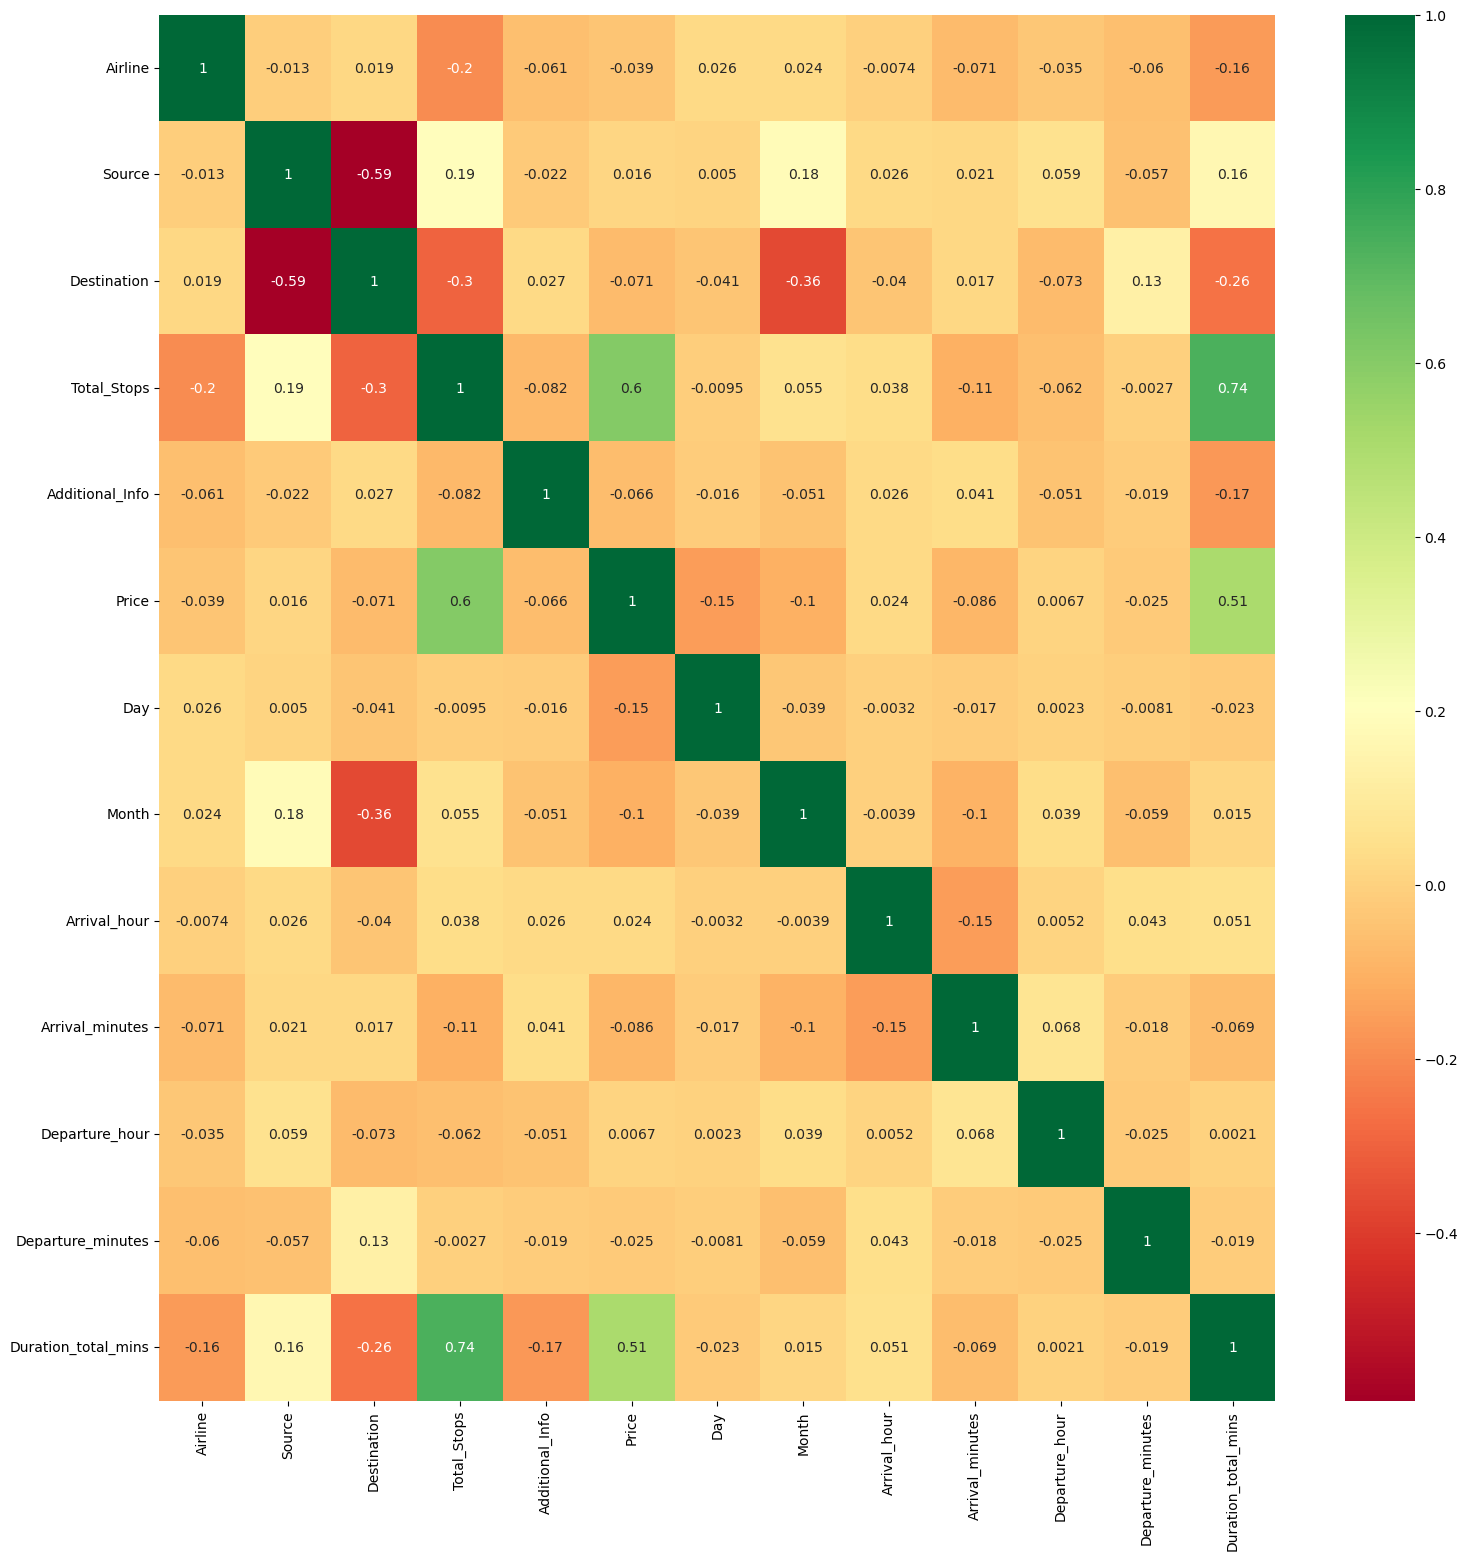

In [93]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")

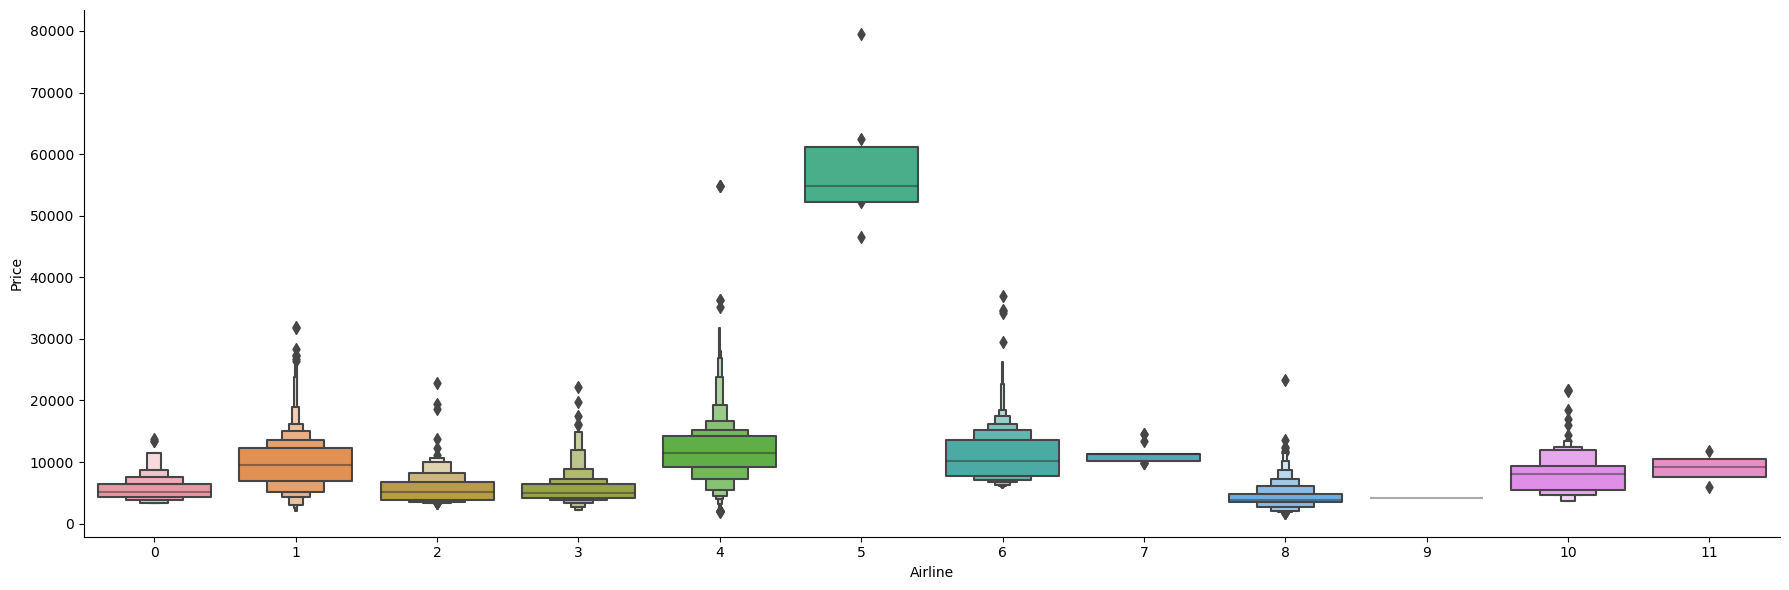

In [94]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

In [95]:
train_df['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

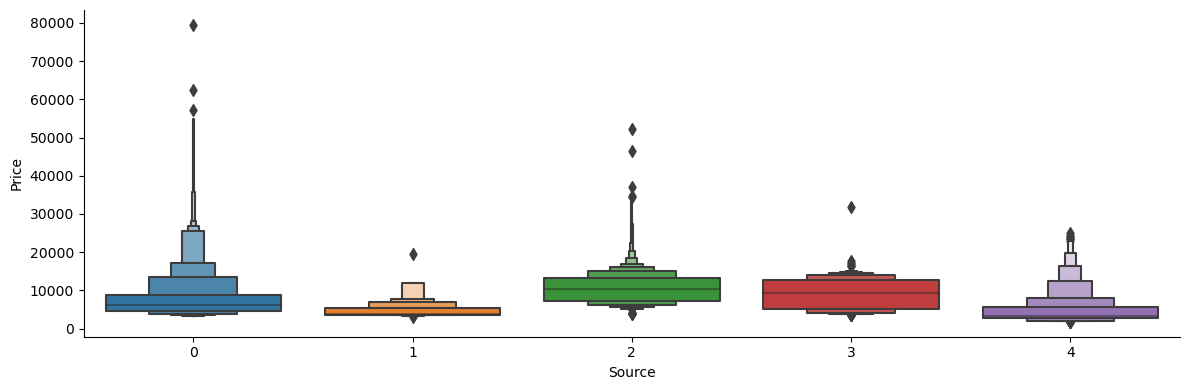

In [96]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)

### TEST DATA

In [97]:
test_df=pd.read_excel('Test.xlsx')

In [98]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


### Preprocessing

In [99]:
test_df["Date"]=test_df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
test_df["Month"]=test_df['Date_of_Journey'].apply(lambda x:x.split("/")[1])

In [100]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05


In [101]:
test_df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

0       04:25
1       10:20
2       19:00
3       21:00
4       02:45
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 2671, dtype: object

In [102]:
test_df['Arrival_Time']=test_df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

In [103]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,6,06
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1 stop,In-flight meal not included,21,05
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,non-stop,No info,24,06


In [104]:
test_df["Arrival_hour"]=test_df["Arrival_Time"].apply(lambda x:x.split(":")[0])
test_df["Arrival_minutes"]=test_df["Arrival_Time"].apply(lambda x:x.split(":")[1])

In [105]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,6,06,04,25
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,10,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1 stop,In-flight meal not included,21,05,19,00
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,21,00
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,non-stop,No info,24,06,02,45


In [106]:
test_df["Departure_hour"]=test_df["Dep_Time"].apply(lambda x:x.split(":")[0])
test_df["Departure_minutes"]=test_df["Dep_Time"].apply(lambda x:x.split(":")[1])

In [107]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,6,06,04,25,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,10,20,06,20


In [108]:
test_df["Total_Stops"].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [109]:
test_df.isnull().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info      0
Date                 0
Month                0
Arrival_hour         0
Arrival_minutes      0
Departure_hour       0
Departure_minutes    0
dtype: int64

In [110]:
test_df['Total_Stops']=test_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [111]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,6,06,04,25,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,05,10,20,06,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,21,05,19,00,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,05,21,00,08,00
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0,No info,24,06,02,45,23,55


In [112]:
test_df["Duration_hour"]=test_df['Duration'].str.split(" ").str[0].str.split('h').str[0]

In [113]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,6,06,04,25,17,30,10
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,05,10,20,06,20,4


In [114]:
test_df[test_df['Duration_hour']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,12,03,16,55,16,50,5m


In [115]:
test_df.drop(2660,axis=0,inplace=True)

In [116]:
test_df['Duration_minutes']=test_df['Duration'].str.split(" ").str[1]

In [117]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,6,06,04,25,17,30,10,55m
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,05,10,20,06,20,4,NaN


In [118]:
test_df["Duration_minutes"]=test_df['Duration_minutes'].str.split("m").str[0]

In [119]:
test_df['Duration_minutes'] = test_df['Duration_minutes'].replace(np.nan, 0)

In [120]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,6,06,04,25,17,30,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,05,10,20,06,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,21,05,19,00,19,15,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,05,21,00,08,00,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0,No info,24,06,02,45,23,55,2,50


In [121]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2670 non-null   object
 1   Date_of_Journey    2670 non-null   object
 2   Source             2670 non-null   object
 3   Destination        2670 non-null   object
 4   Route              2670 non-null   object
 5   Dep_Time           2670 non-null   object
 6   Arrival_Time       2670 non-null   object
 7   Duration           2670 non-null   object
 8   Total_Stops        2670 non-null   int64 
 9   Additional_Info    2670 non-null   object
 10  Date               2670 non-null   object
 11  Month              2670 non-null   object
 12  Arrival_hour       2670 non-null   object
 13  Arrival_minutes    2670 non-null   object
 14  Departure_hour     2670 non-null   object
 15  Departure_minutes  2670 non-null   object
 16  Duration_hour      2670 non-null   object


In [122]:
test_df["Duration_hour"]=test_df["Duration_hour"].astype(int)
test_df["Duration_minutes"]=test_df["Duration_minutes"].astype(int)

In [123]:
test_df["Duration_hour"]=test_df["Duration_hour"]*60

In [124]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,6,06,04,25,17,30,600,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,05,10,20,06,20,240,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,21,05,19,00,19,15,1380,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,05,21,00,08,00,780,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0,No info,24,06,02,45,23,55,120,50


In [125]:
test_df["Duration_total_mins"]=test_df["Duration_hour"]+test_df["Duration_minutes"]

In [126]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes,Duration_total_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,6,06,04,25,17,30,600,55,655
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,05,10,20,06,20,240,0,240
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,21,05,19,00,19,15,1380,45,1425
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,05,21,00,08,00,780,0,780
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0,No info,24,06,02,45,23,55,120,50,170


In [127]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2670 non-null   object
 1   Date_of_Journey      2670 non-null   object
 2   Source               2670 non-null   object
 3   Destination          2670 non-null   object
 4   Route                2670 non-null   object
 5   Dep_Time             2670 non-null   object
 6   Arrival_Time         2670 non-null   object
 7   Duration             2670 non-null   object
 8   Total_Stops          2670 non-null   int64 
 9   Additional_Info      2670 non-null   object
 10  Date                 2670 non-null   object
 11  Month                2670 non-null   object
 12  Arrival_hour         2670 non-null   object
 13  Arrival_minutes      2670 non-null   object
 14  Departure_hour       2670 non-null   object
 15  Departure_minutes    2670 non-null   object
 16  Durati

In [128]:
test_df.drop('Route',axis=1,inplace=True)
test_df.drop('Dep_Time',axis=1,inplace=True)
test_df.drop('Arrival_Time',axis=1,inplace=True)
test_df.drop('Date_of_Journey',axis=1,inplace=True)

In [129]:
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes,Duration_total_mins
0,Jet Airways,Delhi,Cochin,10h 55m,1,No info,6,06,04,25,17,30,600,55,655
1,IndiGo,Kolkata,Banglore,4h,1,No info,12,05,10,20,06,20,240,0,240
2,Jet Airways,Delhi,Cochin,23h 45m,1,In-flight meal not included,21,05,19,00,19,15,1380,45,1425
3,Multiple carriers,Delhi,Cochin,13h,1,No info,21,05,21,00,08,00,780,0,780
4,Air Asia,Banglore,Delhi,2h 50m,0,No info,24,06,02,45,23,55,120,50,170


In [130]:
test_df.drop('Duration',axis=1,inplace=True)

In [131]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes,Duration_total_mins
0,Jet Airways,Delhi,Cochin,1,No info,6,06,04,25,17,30,600,55,655
1,IndiGo,Kolkata,Banglore,1,No info,12,05,10,20,06,20,240,0,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,05,19,00,19,15,1380,45,1425
3,Multiple carriers,Delhi,Cochin,1,No info,21,05,21,00,08,00,780,0,780
4,Air Asia,Banglore,Delhi,0,No info,24,06,02,45,23,55,120,50,170


In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2670 non-null   object
 1   Source               2670 non-null   object
 2   Destination          2670 non-null   object
 3   Total_Stops          2670 non-null   int64 
 4   Additional_Info      2670 non-null   object
 5   Date                 2670 non-null   object
 6   Month                2670 non-null   object
 7   Arrival_hour         2670 non-null   object
 8   Arrival_minutes      2670 non-null   object
 9   Departure_hour       2670 non-null   object
 10  Departure_minutes    2670 non-null   object
 11  Duration_hour        2670 non-null   int32 
 12  Duration_minutes     2670 non-null   int32 
 13  Duration_total_mins  2670 non-null   int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 281.6+ KB


In [133]:
test_df['Departure_minutes']=test_df['Departure_minutes'].astype(int)
test_df['Departure_hour']=test_df['Departure_hour'].astype(int)
test_df['Arrival_minutes']=test_df['Arrival_minutes'].astype(int)
test_df['Arrival_hour']=test_df['Arrival_hour'].astype(int)
test_df['Date']=test_df['Date'].astype(int)
test_df['Month']=test_df['Month'].astype(int)

In [134]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2670 non-null   object
 1   Source               2670 non-null   object
 2   Destination          2670 non-null   object
 3   Total_Stops          2670 non-null   int64 
 4   Additional_Info      2670 non-null   object
 5   Date                 2670 non-null   int32 
 6   Month                2670 non-null   int32 
 7   Arrival_hour         2670 non-null   int32 
 8   Arrival_minutes      2670 non-null   int32 
 9   Departure_hour       2670 non-null   int32 
 10  Departure_minutes    2670 non-null   int32 
 11  Duration_hour        2670 non-null   int32 
 12  Duration_minutes     2670 non-null   int32 
 13  Duration_total_mins  2670 non-null   int32 
dtypes: int32(9), int64(1), object(4)
memory usage: 219.0+ KB


###  Handling Categorical variable 

In [135]:
test_df["Airline"]=labelencoder.fit_transform(test_df['Airline'])
test_df["Source"]=labelencoder.fit_transform(test_df['Source'])
test_df["Destination"]=labelencoder.fit_transform(test_df['Destination'])
test_df["Additional_Info"]=labelencoder.fit_transform(test_df['Additional_Info'])

In [136]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_hour,Arrival_minutes,Departure_hour,Departure_minutes,Duration_hour,Duration_minutes,Duration_total_mins
0,4,2,1,1,5,6,6,4,25,17,30,600,55,655
1,3,3,0,1,5,12,5,10,20,6,20,240,0,240
2,4,2,1,1,3,21,5,19,0,19,15,1380,45,1425
3,6,2,1,1,5,21,5,21,0,8,0,780,0,780
4,0,0,2,0,5,24,6,2,45,23,55,120,50,170


In [137]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Airline              2670 non-null   int32
 1   Source               2670 non-null   int32
 2   Destination          2670 non-null   int32
 3   Total_Stops          2670 non-null   int64
 4   Additional_Info      2670 non-null   int32
 5   Date                 2670 non-null   int32
 6   Month                2670 non-null   int32
 7   Arrival_hour         2670 non-null   int32
 8   Arrival_minutes      2670 non-null   int32
 9   Departure_hour       2670 non-null   int32
 10  Departure_minutes    2670 non-null   int32
 11  Duration_hour        2670 non-null   int32
 12  Duration_minutes     2670 non-null   int32
 13  Duration_total_mins  2670 non-null   int32
dtypes: int32(13), int64(1)
memory usage: 177.3 KB


In [138]:
test_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Date                   0
Month                  0
Arrival_hour           0
Arrival_minutes        0
Departure_hour         0
Departure_minutes      0
Duration_hour          0
Duration_minutes       0
Duration_total_mins    0
dtype: int64

### Model Training

In [139]:
X=train_df.drop('Price',axis=1)

In [140]:
X.shape

(10682, 12)

In [141]:
y=train_df['Price']

In [142]:
y.shape

(10682,)

In [143]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [144]:
print(selection.feature_importances_)

[0.1493886  0.02004592 0.04417597 0.26667999 0.05944416 0.12997095
 0.05083667 0.03189145 0.02549038 0.02623717 0.02873377 0.16710498]


<AxesSubplot:>

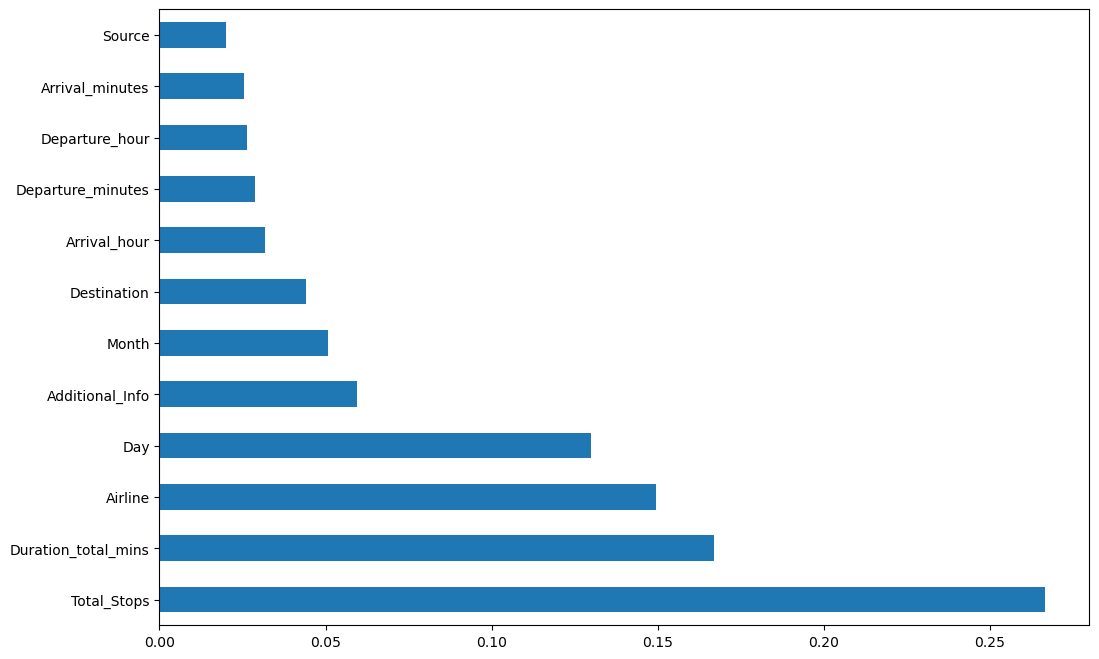

In [145]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Model Training using different Algorithms

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [148]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred= linear_reg.predict(X_test)

In [149]:
#Ridge Regression-L2Regularization
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)

In [150]:
#Lasso Regression -L1 Regularization
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_pred = lasso_reg.predict(X_test)

In [151]:
#DecisionTree Algo
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

In [152]:
#KNN
kneig = KNeighborsRegressor(n_neighbors=25,weights='distance')
kneig.fit(X_train,y_train)
kneig_pred = kneig.predict(X_test)

In [153]:
#Random Forest
rf = RandomForestRegressor(n_estimators= 300,
 min_samples_split= 15,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=15)
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_test)

In [154]:
#Adaboost Regressor
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
ab_prediction=ab.predict(X_test)

In [155]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train,y_train)
xgb_predict = model.predict(X_test)

#### Performing Performance Metrics

In [156]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, linear_reg_pred))
print("R-squared:", r2_score(y_test, linear_reg_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, linear_reg_pred))

print("\nRidge Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, ridge_reg_pred))
print("R-squared:", r2_score(y_test, ridge_reg_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, linear_reg_pred))

print("\nLasso Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, lasso_reg_pred))
print("R-squared:", r2_score(y_test, lasso_reg_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, linear_reg_pred))

print("\nDecision Tree:")
print("Mean Squared Error:", mean_squared_error(y_test, decision_tree_pred))
print("R-squared:", r2_score(y_test, decision_tree_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, linear_reg_pred))

print("\nKNearest Neighbor:")
print("Mean Squared Error:", mean_squared_error(y_test, kneig_pred))
print("R-squared:", r2_score(y_test, kneig_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, kneig_pred))

print("\nRandom Forest")
print("Mean Squared Error:", mean_squared_error(y_test, rf_preds))
print("R-squared:", r2_score(y_test, rf_preds))
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_preds))

print("\nXGBoost")
print("Mean Squared Error:", mean_squared_error(y_test,xgb_predict))
print("R-Squared:", r2_score(y_test,xgb_predict))
print("Mean Absolute Error:",mean_absolute_error(y_test,xgb_predict))

print("\nAdaBoost Regressor")
print("Mean Squared Error:", mean_squared_error(y_test,ab_prediction))
print("R-Squared:", r2_score(y_test,ab_prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,ab_prediction))

Linear Regression:
Mean Squared Error: 11845174.91178325
R-squared: 0.4396535966250562
Mean Absolute Error: 2458.967874035744

Ridge Regression:
Mean Squared Error: 11845106.480047336
R-squared: 0.43965683384843046
Mean Absolute Error: 2458.967874035744

Lasso Regression:
Mean Squared Error: 11845260.51321073
R-squared: 0.43964954717434157
Mean Absolute Error: 2458.967874035744

Decision Tree:
Mean Squared Error: 4264327.205454167
R-squared: 0.7982722559872747
Mean Absolute Error: 2458.967874035744

KNearest Neighbor:
Mean Squared Error: 9524549.356903449
R-squared: 0.5494328268129806
Mean Absolute Error: 1848.480561052236

Random Forest
Mean Squared Error: 2512561.708819792
R-squared: 0.8811410614634125
Mean Absolute Error: 904.0972470999368

XGBoost
Mean Squared Error: 2460166.2163542006
R-Squared: 0.8836196762559174
Mean Absolute Error: 754.7188767543395

AdaBoost Regressor
Mean Squared Error: 14608609.873957993
R-Squared: 0.3089268784847605
Mean Absolute Error: 3232.4344061062993


In [157]:
rf.score(X_train, y_train)

0.8927847236055974

In [158]:
rf.score(X_test, y_test)

0.8811410614634125

C:\Users\SAIKRISHNA\AppData\Local\Temp\ipykernel_11844\306480351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-rf_preds)


<AxesSubplot:xlabel='Price', ylabel='Density'>

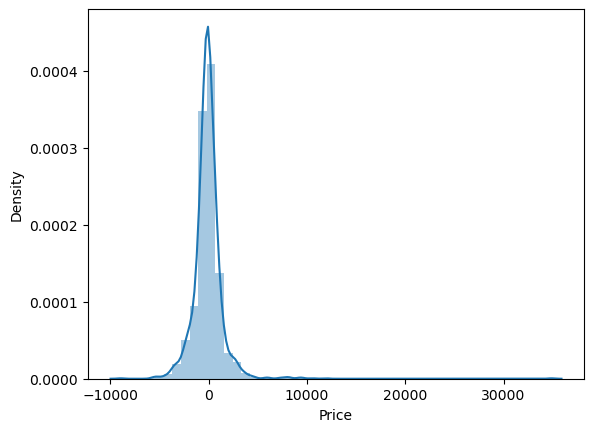

In [159]:
sns.distplot(y_test-rf_preds)

In [160]:
model.score(X_test, y_test)

0.8836196762559174

In [161]:
model.score(X_train, y_train)

0.9721960858358566

In [162]:
from sklearn import metrics
metrics.r2_score(y_test, xgb_predict)

0.8836196762559174

In [163]:
metrics.r2_score(y_test, rf_preds)

0.8811410614634125

In [164]:
#XGBoost Regressor
import xgboost as xgb
model_accuracy = xgb.XGBRegressor()
model_accuracy= model_accuracy.fit(X_train, y_train)
xgb_pred = model_accuracy.predict(X_test)
score = r2_score(y_test, xgb_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.36


In [165]:
#RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=_preds = rf.predict(X_test)
score = r2_score(y_test, rf_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.64


Text(0.5, 1.0, 'Actual vs Predicted for XGBOOST')

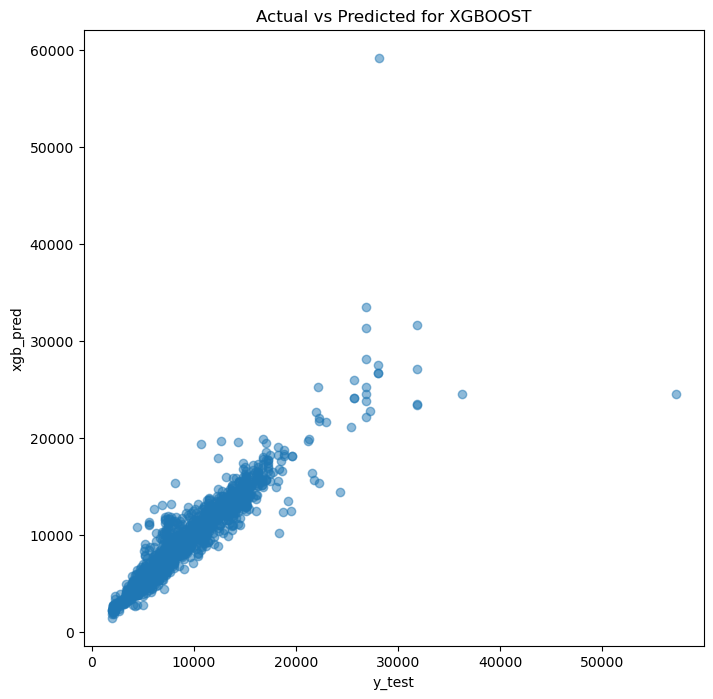

In [166]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,xgb_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("xgb_pred")
plt.title('Actual vs Predicted for XGBOOST')

Text(0.5, 1.0, 'Actual vs Predicted for Random Forest')

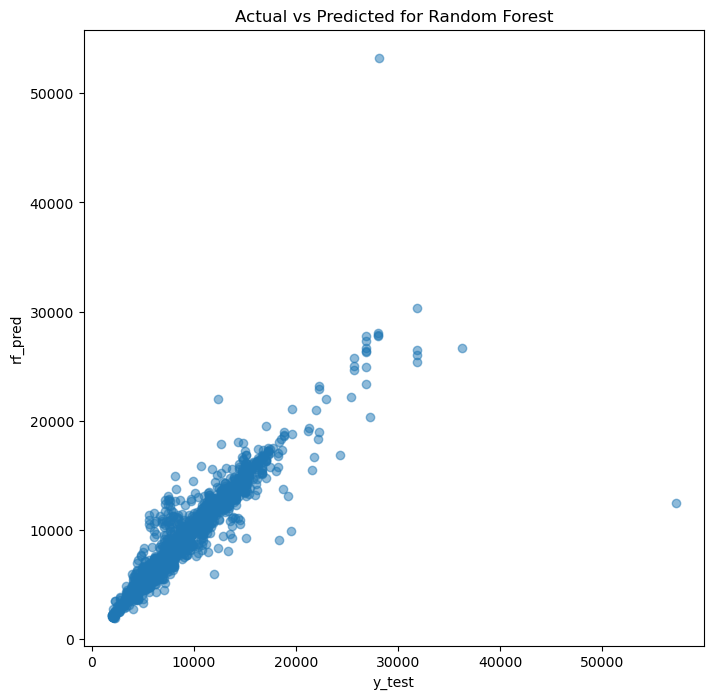

In [167]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,rf_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("rf_pred")
plt.title('Actual vs Predicted for Random Forest')

### Save the model

In [172]:
import pickle
# open a file, where you want to store the data
file = open('flight_price_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [173]:
ml_model = open('flight_price_xgb.pkl','rb')
XGBoost = pickle.load(ml_model)

In [174]:
y_prediction = XGBoost.predict(X_test)

In [175]:
metrics.r2_score(y_test, y_prediction)

0.8836196762559174

In [176]:
pip freeze requirements.txt

Note: you may need to restart the kernel to use updated packages.aiohttp==3.9.1
aiosignal==1.3.1
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==5.2.0
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
annotated-types==0.6.0
ansi2html @ file:///D:/bld/ansi2html_1695769066904/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
asttokens==2.4.1
async-timeout==4.0.3
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
audioread==3.0.1
Automat @ file:///tmp/build/8